In [1]:
# import all package

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [2]:
# Read csv data from local disk
df = pd.read_csv("Admission_Predict.csv")

# This line change the name of column i.e. "Chance of Admit " to "Chance of Admit" ,in last we remove just space
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

# it may be needed in the future.
serialNo = df["Serial No."].values

# Delete serial number from dataframe
df.drop(["Serial No."],axis=1,inplace = True)

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# It gives statistical overview of given data

df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
# Check if there is null or not and if there is null then i will give total number of null values i.e. count

df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

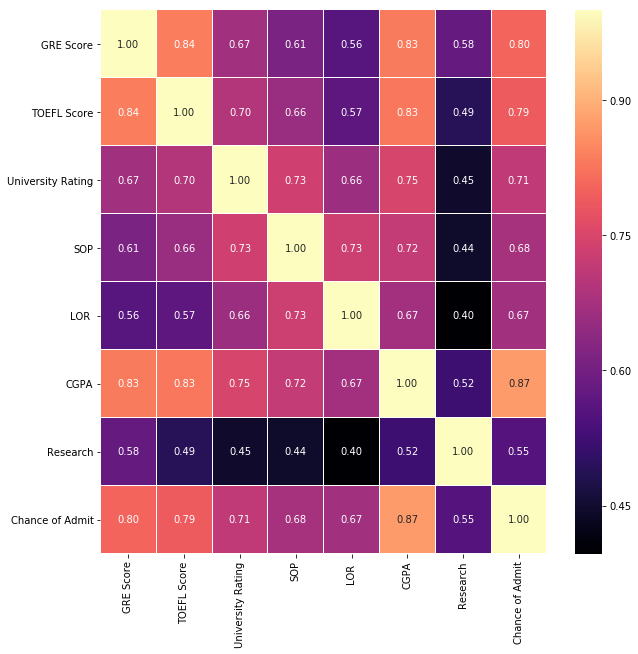

In [5]:
# Correlation between different varaibles

fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [6]:
# Values of correlation w.r.t Chance of Admit 

cor=df.corr()['Chance of Admit'].sort_values(ascending=False)
print(cor)

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit, dtype: float64


Not Having Research: 181
Having Research: 219


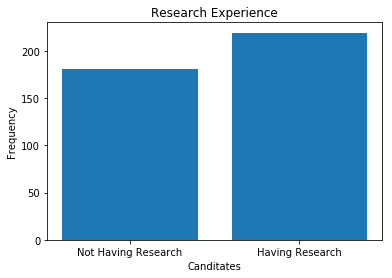

In [7]:
print("Not Having Research:",len(df[df.Research == 0]))
print("Having Research:",len(df[df.Research == 1]))
y=[len(df[df.Research==0]),len(df[df.Research==1])]
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

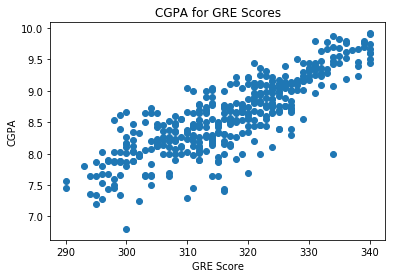

In [8]:
# Scatter plot between CGPA vs GRE score
# df.GRE Score did not work because there is space between GRE and Score ,so i use df["GRE Score"]

plt.scatter(df["GRE Score"],df.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

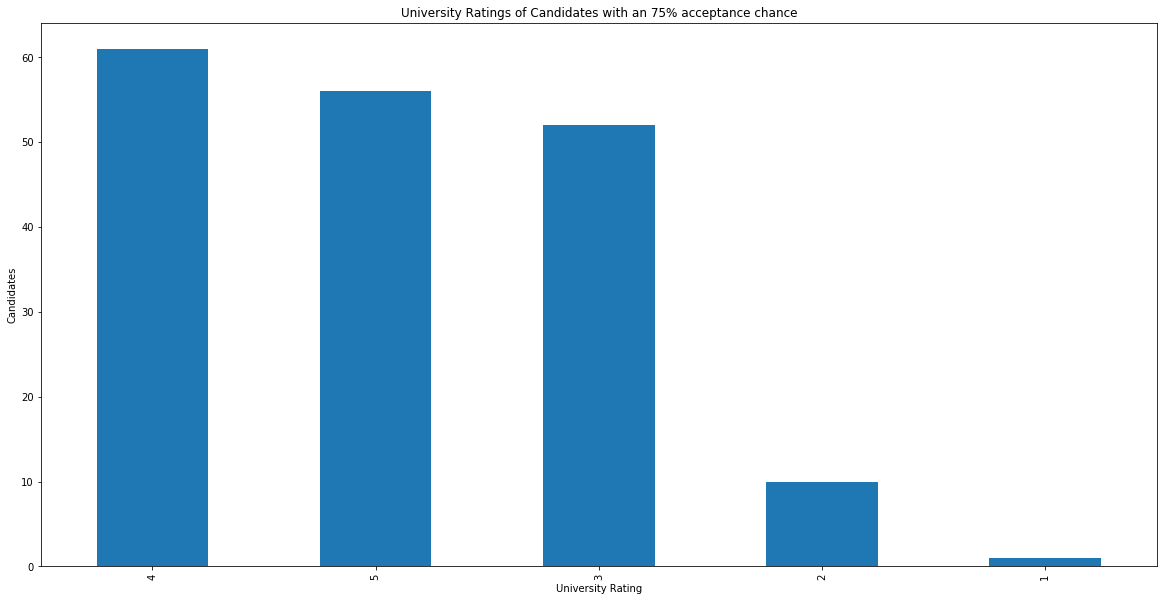

In [9]:
# Number of candidates w.r.t university and their 75% acceptance chance
# value_counts() mean return a Series containing counts of unique values

s = df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

In [10]:
# Average score needed for candidate to admit 
# If they have average score given below then there is chance of 90% to get admission

df[(df['Chance of Admit']>0.90)].mean()

GRE Score            333.612245
TOEFL Score          116.285714
University Rating      4.653061
SOP                    4.561224
LOR                    4.479592
CGPA                   9.536939
Research               1.000000
Chance of Admit        0.937551
dtype: float64

## Prediction Using ANN

In [11]:
# Modify column data in dataframe 
# Replace value>=0.75 into 1 
# Replace value<0.75 into 0
df.loc[df['Chance of Admit']>=0.75,['Chance of Admit']]=1
df.loc[df['Chance of Admit']<0.75,['Chance of Admit']]=0

In [12]:
import keras

# X is input for our model
X=df.iloc[:,:-1].values

# y is output for our model
y=df.iloc[:,-1].values

Using TensorFlow backend.


In [13]:
# Split dataset in train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=1)

/home/ujjawalpoudel/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 128, init = 'uniform', activation = 'relu', input_dim = 7))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 32, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 1000)

/home/ujjawalpoudel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=7, units=128, kernel_initializer="uniform")`
  if __name__ == '__main__':
/home/ujjawalpoudel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32, kernel_initializer="uniform")`
  if sys.path[0] == '':
/home/ujjawalpoudel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/home/ujjawalpoudel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1000
280/280 [==============================] - 0s 775us/step - loss: 0.7154 - acc: 0.5214
Epoch 2/1000
280/280 [==============================] - 0s 90us/step - loss: 0.6934 - acc: 0.5500
Epoch 3/1000
280/280 [==============================] - 0s 98us/step - loss: 0.6881 - acc: 0.5500
Epoch 4/1000
280/280 [==============================] - 0s 94us/step - loss: 0.6901 - acc: 0.5500
Epoch 5/1000
280/280 [==============================] - 0s 91us/step - loss: 0.6907 - acc: 0.4857
Epoch 6/1000
280/280 [==============================] - 0s 94us/step - loss: 0.6917 - acc: 0.5500
Epoch 7/1000
280/280 [==============================] - 0s 131us/step - loss: 0.6872 - acc: 0.5500
Epoch 8/1000
280/280 [==============================] - 0s 120us/step - loss: 0.6864 - acc: 0.5500
Epoch 9/1000
280/280 [==============================] - 0s 126us/step - loss: 0.6837 - acc: 0.5500
Epoch 10/1000
280/280 [==============================] - 0s 121us/step - loss: 0.6818 - acc: 0.5500
Epoch 11/1000


280/280 [==============================] - 0s 105us/step - loss: 0.4146 - acc: 0.8036
Epoch 84/1000
280/280 [==============================] - 0s 113us/step - loss: 0.4212 - acc: 0.7893
Epoch 85/1000
280/280 [==============================] - 0s 115us/step - loss: 0.4021 - acc: 0.8250
Epoch 86/1000
280/280 [==============================] - 0s 108us/step - loss: 0.3970 - acc: 0.7929
Epoch 87/1000
280/280 [==============================] - 0s 125us/step - loss: 0.3840 - acc: 0.8321
Epoch 88/1000
280/280 [==============================] - 0s 122us/step - loss: 0.3843 - acc: 0.8214
Epoch 89/1000
280/280 [==============================] - 0s 117us/step - loss: 0.4427 - acc: 0.8036
Epoch 90/1000
280/280 [==============================] - 0s 117us/step - loss: 0.3795 - acc: 0.8321
Epoch 91/1000
280/280 [==============================] - 0s 110us/step - loss: 0.3913 - acc: 0.8286
Epoch 92/1000
280/280 [==============================] - 0s 117us/step - loss: 0.3927 - acc: 0.8071
Epoch 93/1000


280/280 [==============================] - 0s 117us/step - loss: 0.3846 - acc: 0.8321
Epoch 165/1000
280/280 [==============================] - 0s 136us/step - loss: 0.3842 - acc: 0.8214
Epoch 166/1000
280/280 [==============================] - 0s 108us/step - loss: 0.3793 - acc: 0.8393
Epoch 167/1000
280/280 [==============================] - 0s 100us/step - loss: 0.3901 - acc: 0.8214
Epoch 168/1000
280/280 [==============================] - 0s 92us/step - loss: 0.4262 - acc: 0.8071
Epoch 169/1000
280/280 [==============================] - 0s 93us/step - loss: 0.3944 - acc: 0.8393
Epoch 170/1000
280/280 [==============================] - 0s 110us/step - loss: 0.4013 - acc: 0.8107
Epoch 171/1000
280/280 [==============================] - 0s 89us/step - loss: 0.3867 - acc: 0.8250
Epoch 172/1000
280/280 [==============================] - 0s 102us/step - loss: 0.3889 - acc: 0.8107
Epoch 173/1000
280/280 [==============================] - 0s 110us/step - loss: 0.3842 - acc: 0.8250
Epoch 17

280/280 [==============================] - 0s 105us/step - loss: 0.3823 - acc: 0.8393
Epoch 246/1000
280/280 [==============================] - 0s 88us/step - loss: 0.3759 - acc: 0.8321
Epoch 247/1000
280/280 [==============================] - 0s 91us/step - loss: 0.3804 - acc: 0.8250
Epoch 248/1000
280/280 [==============================] - 0s 92us/step - loss: 0.3907 - acc: 0.8250
Epoch 249/1000
280/280 [==============================] - 0s 95us/step - loss: 0.3801 - acc: 0.8071
Epoch 250/1000
280/280 [==============================] - 0s 98us/step - loss: 0.3791 - acc: 0.8357
Epoch 251/1000
280/280 [==============================] - 0s 90us/step - loss: 0.3753 - acc: 0.8500
Epoch 252/1000
280/280 [==============================] - 0s 99us/step - loss: 0.3813 - acc: 0.8536
Epoch 253/1000
280/280 [==============================] - 0s 87us/step - loss: 0.3762 - acc: 0.8321
Epoch 254/1000
280/280 [==============================] - 0s 88us/step - loss: 0.3884 - acc: 0.8214
Epoch 255/1000

280/280 [==============================] - 0s 98us/step - loss: 0.4121 - acc: 0.8179
Epoch 327/1000
280/280 [==============================] - 0s 102us/step - loss: 0.3932 - acc: 0.8393
Epoch 328/1000
280/280 [==============================] - 0s 91us/step - loss: 0.3868 - acc: 0.8429
Epoch 329/1000
280/280 [==============================] - 0s 96us/step - loss: 0.3844 - acc: 0.8179
Epoch 330/1000
280/280 [==============================] - 0s 96us/step - loss: 0.3722 - acc: 0.8321
Epoch 331/1000
280/280 [==============================] - 0s 93us/step - loss: 0.3782 - acc: 0.8393
Epoch 332/1000
280/280 [==============================] - 0s 86us/step - loss: 0.3994 - acc: 0.8000
Epoch 333/1000
280/280 [==============================] - 0s 94us/step - loss: 0.3804 - acc: 0.8321
Epoch 334/1000
280/280 [==============================] - 0s 88us/step - loss: 0.3916 - acc: 0.8214
Epoch 335/1000
280/280 [==============================] - 0s 142us/step - loss: 0.3710 - acc: 0.8464
Epoch 336/100

280/280 [==============================] - 0s 92us/step - loss: 0.3963 - acc: 0.8036
Epoch 408/1000
280/280 [==============================] - 0s 94us/step - loss: 0.3825 - acc: 0.8143
Epoch 409/1000
280/280 [==============================] - 0s 92us/step - loss: 0.3900 - acc: 0.8214
Epoch 410/1000
280/280 [==============================] - 0s 97us/step - loss: 0.3994 - acc: 0.8250
Epoch 411/1000
280/280 [==============================] - 0s 95us/step - loss: 0.3939 - acc: 0.8321
Epoch 412/1000
280/280 [==============================] - 0s 94us/step - loss: 0.3722 - acc: 0.8286
Epoch 413/1000
280/280 [==============================] - 0s 93us/step - loss: 0.3730 - acc: 0.8393
Epoch 414/1000
280/280 [==============================] - 0s 102us/step - loss: 0.3918 - acc: 0.8250
Epoch 415/1000
280/280 [==============================] - 0s 108us/step - loss: 0.3730 - acc: 0.8286
Epoch 416/1000
280/280 [==============================] - 0s 101us/step - loss: 0.3714 - acc: 0.8571
Epoch 417/10

280/280 [==============================] - 0s 115us/step - loss: 0.3773 - acc: 0.8393
Epoch 489/1000
280/280 [==============================] - 0s 116us/step - loss: 0.3973 - acc: 0.8321
Epoch 490/1000
280/280 [==============================] - 0s 115us/step - loss: 0.3830 - acc: 0.8179
Epoch 491/1000
280/280 [==============================] - 0s 117us/step - loss: 0.3733 - acc: 0.8250
Epoch 492/1000
280/280 [==============================] - 0s 117us/step - loss: 0.3810 - acc: 0.8500
Epoch 493/1000
280/280 [==============================] - 0s 133us/step - loss: 0.3803 - acc: 0.8429
Epoch 494/1000
280/280 [==============================] - 0s 110us/step - loss: 0.3707 - acc: 0.8429
Epoch 495/1000
280/280 [==============================] - 0s 110us/step - loss: 0.3834 - acc: 0.8357
Epoch 496/1000
280/280 [==============================] - 0s 108us/step - loss: 0.3773 - acc: 0.8214
Epoch 497/1000
280/280 [==============================] - 0s 118us/step - loss: 0.3809 - acc: 0.8321
Epoch

280/280 [==============================] - 0s 96us/step - loss: 0.3773 - acc: 0.8286
Epoch 570/1000
280/280 [==============================] - 0s 94us/step - loss: 0.3642 - acc: 0.8429
Epoch 571/1000
280/280 [==============================] - 0s 87us/step - loss: 0.3906 - acc: 0.8286
Epoch 572/1000
280/280 [==============================] - 0s 89us/step - loss: 0.3790 - acc: 0.8286
Epoch 573/1000
280/280 [==============================] - 0s 89us/step - loss: 0.3805 - acc: 0.8214
Epoch 574/1000
280/280 [==============================] - 0s 92us/step - loss: 0.3751 - acc: 0.8429
Epoch 575/1000
280/280 [==============================] - 0s 90us/step - loss: 0.3771 - acc: 0.8393
Epoch 576/1000
280/280 [==============================] - 0s 89us/step - loss: 0.3684 - acc: 0.8429
Epoch 577/1000
280/280 [==============================] - 0s 115us/step - loss: 0.3710 - acc: 0.8357
Epoch 578/1000
280/280 [==============================] - 0s 100us/step - loss: 0.3806 - acc: 0.8250
Epoch 579/100

280/280 [==============================] - 0s 114us/step - loss: 0.3646 - acc: 0.8464
Epoch 651/1000
280/280 [==============================] - 0s 134us/step - loss: 0.3772 - acc: 0.8429
Epoch 652/1000
280/280 [==============================] - 0s 104us/step - loss: 0.3653 - acc: 0.8500
Epoch 653/1000
280/280 [==============================] - 0s 106us/step - loss: 0.3937 - acc: 0.8321
Epoch 654/1000
280/280 [==============================] - 0s 116us/step - loss: 0.3706 - acc: 0.8429
Epoch 655/1000
280/280 [==============================] - 0s 104us/step - loss: 0.3711 - acc: 0.8429
Epoch 656/1000
280/280 [==============================] - 0s 95us/step - loss: 0.3723 - acc: 0.8429
Epoch 657/1000
280/280 [==============================] - 0s 90us/step - loss: 0.3752 - acc: 0.8250
Epoch 658/1000
280/280 [==============================] - 0s 90us/step - loss: 0.3867 - acc: 0.8321
Epoch 659/1000
280/280 [==============================] - 0s 98us/step - loss: 0.3682 - acc: 0.8429
Epoch 660

280/280 [==============================] - 0s 102us/step - loss: 0.4008 - acc: 0.8214
Epoch 732/1000
280/280 [==============================] - 0s 96us/step - loss: 0.3884 - acc: 0.8143
Epoch 733/1000
280/280 [==============================] - 0s 88us/step - loss: 0.3816 - acc: 0.8357
Epoch 734/1000
280/280 [==============================] - 0s 92us/step - loss: 0.3679 - acc: 0.8429
Epoch 735/1000
280/280 [==============================] - 0s 100us/step - loss: 0.3662 - acc: 0.8429
Epoch 736/1000
280/280 [==============================] - 0s 95us/step - loss: 0.3829 - acc: 0.8357
Epoch 737/1000
280/280 [==============================] - 0s 89us/step - loss: 0.3711 - acc: 0.8393
Epoch 738/1000
280/280 [==============================] - 0s 95us/step - loss: 0.3707 - acc: 0.8393
Epoch 739/1000
280/280 [==============================] - 0s 90us/step - loss: 0.3811 - acc: 0.8357
Epoch 740/1000
280/280 [==============================] - 0s 93us/step - loss: 0.3832 - acc: 0.8321
Epoch 741/100

280/280 [==============================] - 0s 108us/step - loss: 0.3699 - acc: 0.8393
Epoch 813/1000
280/280 [==============================] - 0s 92us/step - loss: 0.3818 - acc: 0.8286
Epoch 814/1000
280/280 [==============================] - 0s 87us/step - loss: 0.3803 - acc: 0.8000
Epoch 815/1000
280/280 [==============================] - 0s 86us/step - loss: 0.3694 - acc: 0.8357
Epoch 816/1000
280/280 [==============================] - 0s 85us/step - loss: 0.3690 - acc: 0.8464
Epoch 817/1000
280/280 [==============================] - 0s 88us/step - loss: 0.3650 - acc: 0.8429
Epoch 818/1000
280/280 [==============================] - 0s 91us/step - loss: 0.3939 - acc: 0.8107
Epoch 819/1000
280/280 [==============================] - 0s 138us/step - loss: 0.3845 - acc: 0.8179
Epoch 820/1000
280/280 [==============================] - 0s 130us/step - loss: 0.3860 - acc: 0.8214
Epoch 821/1000
280/280 [==============================] - 0s 114us/step - loss: 0.3810 - acc: 0.8321
Epoch 822/1

280/280 [==============================] - 0s 239us/step - loss: 0.3651 - acc: 0.8321
Epoch 894/1000
280/280 [==============================] - 0s 188us/step - loss: 0.3635 - acc: 0.8429
Epoch 895/1000
280/280 [==============================] - 0s 105us/step - loss: 0.3666 - acc: 0.8429
Epoch 896/1000
280/280 [==============================] - 0s 109us/step - loss: 0.3673 - acc: 0.8286
Epoch 897/1000
280/280 [==============================] - 0s 120us/step - loss: 0.3628 - acc: 0.8393
Epoch 898/1000
280/280 [==============================] - 0s 133us/step - loss: 0.3680 - acc: 0.8393
Epoch 899/1000
280/280 [==============================] - 0s 126us/step - loss: 0.3792 - acc: 0.8321
Epoch 900/1000
280/280 [==============================] - 0s 140us/step - loss: 0.3776 - acc: 0.8500
Epoch 901/1000
280/280 [==============================] - 0s 120us/step - loss: 0.3617 - acc: 0.8429
Epoch 902/1000
280/280 [==============================] - 0s 124us/step - loss: 0.3670 - acc: 0.8286
Epoch

280/280 [==============================] - 0s 91us/step - loss: 0.3683 - acc: 0.8321
Epoch 975/1000
280/280 [==============================] - 0s 98us/step - loss: 0.3612 - acc: 0.8464
Epoch 976/1000
280/280 [==============================] - 0s 102us/step - loss: 0.3651 - acc: 0.8536
Epoch 977/1000
280/280 [==============================] - 0s 100us/step - loss: 0.3675 - acc: 0.8357
Epoch 978/1000
280/280 [==============================] - 0s 99us/step - loss: 0.3671 - acc: 0.8321
Epoch 979/1000
280/280 [==============================] - 0s 91us/step - loss: 0.3838 - acc: 0.8143
Epoch 980/1000
280/280 [==============================] - 0s 93us/step - loss: 0.3802 - acc: 0.8214
Epoch 981/1000
280/280 [==============================] - 0s 95us/step - loss: 0.3686 - acc: 0.8429
Epoch 982/1000
280/280 [==============================] - 0s 101us/step - loss: 0.3631 - acc: 0.8357
Epoch 983/1000
280/280 [==============================] - 0s 93us/step - loss: 0.3653 - acc: 0.8286
Epoch 984/10

In [15]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.75)

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  2],
       [19, 35]])